# Actividad

- **Nombre**: Leonardo Pérez, David Sánchez, Geraldine Torres
- **Matrícula**: a00829368, a01720476, a01568178

# Entregar 
Archivo PDF de la actividad y la liga de la actividad en su repostitorio.

# Nota: 
Todas las tareas entregadas fuera de la fecha limite se califican sobre 50 de los 100 puntos posibles.

# Importante: 
- Colocar nombre en ejes en gráficas
- Nombre en gráficas 
- Conclusiones con el nombre de cada alumno
- Contestar cada pregunta


#**Presion Arterial**

1. Carga los datos del archivo **presion.csv**

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
%cd drive/MyDrive/TEC/5to\ Semestre/Semana\ Tec/Herramientas/SemanaTec/arte-analitica


/content/drive/MyDrive/TEC/5to Semestre/Semana Tec/Herramientas/SemanaTec/arte-analitica


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [ ]:
presion = pd.read_csv('data/presion.csv', )
presion.head()

,edad,Average of ap_hi,Average of ap_lo
0,30,112.500000,72.500000
1,39,119.029340,88.229829
2,40,119.789630,85.858889
3,41,121.490862,90.344648
4,42,120.163872,89.887957


2. Gráfica la información en el eje de las x la edad  y en el eje y la presión ( alta y baja) 


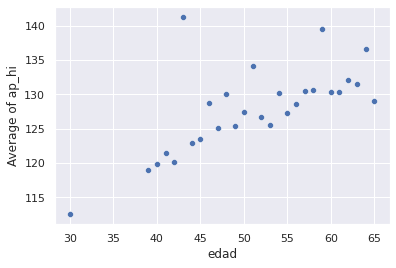

In [ ]:
# alta
sns.scatterplot(data=presion, x='edad',y='Average of ap_hi')

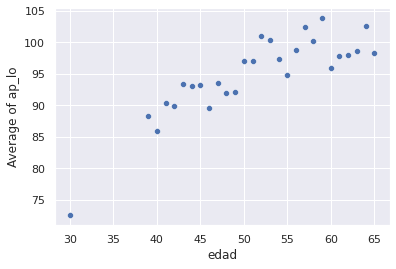

In [ ]:
# baja
sns.scatterplot(data=presion, x='edad',y='Average of ap_lo')

3. Genera una regresión líneal para obtener una aproximación de la ecuación 
$$
y = ax + b
$$
donde $ a $ se conoce comúnmente como **pendiente**, y $ b $ se conoce comúnmente como **intersección**.

¿Cuál es el valor de a y cuál es el valor de b para la presión alta y baja?

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# alta
lm1 = LinearRegression()
lm1.fit(presion[['edad']], presion['Average of ap_hi'])
altaI = lm1.intercept_
altaP = lm1.coef_
print('intersección: ', lm1.intercept_)
print('pendiente: ', lm1.coef_)
print('Score: ', lm1.score(presion[['edad']], presion['Average of ap_hi']), '\n')

intersección:  103.39697409643658
pendiente:  [0.47769703]
Score:  0.4590368035910293 



In [ ]:
# baja
lm1 = LinearRegression()
lm1.fit(presion[['edad']], presion['Average of ap_lo'])
bajaI = lm1.intercept_
bajaP = lm1.coef_
print('intersección: ', lm1.intercept_)
print('pendiente: ', lm1.coef_)
print('Score: ', lm1.score(presion[['edad']], presion['Average of ap_lo']), '\n')

intersección:  63.726200409422745
pendiente:  [0.60898106]
Score:  0.7129328807839572 



4. Gráfica los datos reales vs modelo obtenido. 

Se debe visualizar los datos reales ( azules) 
Recta del modelo ( negra) 
Distancias ( verde ) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


Text(0, 0.5, 'Average of ap_hi')

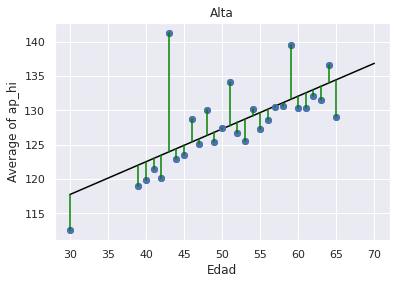

In [ ]:
# alta
model = LinearRegression(fit_intercept=True)

x = presion['edad']
y = presion['Average of ap_hi']
model.fit(x[:, np.newaxis], y)

xfit = np.linspace(30, 70, 100)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit, color="black");
plt.plot(x,y, 'o')
plt.plot(np.vstack([x,x]), np.vstack([y, model.predict(x[:, np.newaxis])]), color="green");
plt.title('Alta')
plt.xlabel('Edad')
plt.ylabel('Average of ap_hi')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


Text(0, 0.5, 'Average of ap_lo')

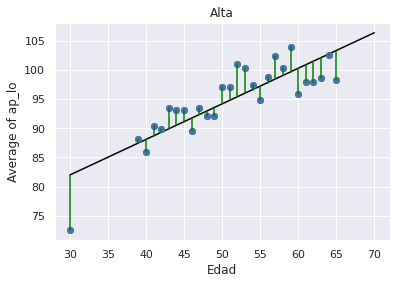

In [ ]:
# baja
model = LinearRegression(fit_intercept=True)

x = presion['edad']
y = presion['Average of ap_lo']
model.fit(x[:, np.newaxis], y)

xfit = np.linspace(30, 70, 100)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit, color="black");
plt.plot(x,y, 'o')
plt.plot(np.vstack([x,x]), np.vstack([y, model.predict(x[:, np.newaxis])]), color="green");
plt.title('Alta')
plt.xlabel('Edad')
plt.ylabel('Average of ap_lo')

5. ¿Cuál es la presión arterial hi y lo esperada para una persona de 76 años?

Genera una función que calcule lo anterior

In [ ]:
edad_calcular=74

def presionHi(edad):
  pHi = bajaI + edad * bajaP
  return  pHi.item(0)

presionHi(edad_calcular)

108.79079870318571

In [ ]:
def presionLo(edad):
  #intercept + edad * coef
  phL = altaI + edad * altaP
  return phL.item(0) 

presionLo(edad_calcular)

138.7465542999118

6. Conclusiones 

A00829368 Leonardo Pérez Estrada: Con el desarrollo de esta actividad se puso  en práctica lo aprendido en clase, algo que aprendí es de la efectividad de Google Colaboratory para la Analítica, su gran cantidad de librerías ayudan mucho a lo que es el análisis de datos, por lo que es una herramienta que me va a servir mucho en el futuro en distintas problematicas académicas o incluso profesionales.

A01568178-Geraldine Torres: En base a los datos proporcionados y a las gráficas obtenidas, se puede concluir que la gráfico con un mejor modelo es la de Presión Baja vs Edad. El coéficiente de determianción de la gráfica anterior nos da como resultado un 72%, al ser el coeficiente mayor y el que más se acerca al 100% podemos decir que el modelo se ajustó mejor a los datos. Por otro lado, el modelo de Presión Alta vs Edad nos dio un coeficiente del 46% ya que contamos con datos muy alejados de la media en comapración a Presión Baja vs Edad. Para poder realizar un mejor análisis se recomienda solucionar als incertidumbres en los datos.

A01720476- David Sanchez: Con esta actividad yo pude observar lo útil que puede llegar a ser la regresión lineal ya que con información muy limitada y una simple implementación se pudo derivar una recomendación médica relacionada con el cuerpo humano. Lo que más me sorprendió fue lo fácil que se pueden conseguir estos números y gráficas utilizando el análisis de datos. 


#**Ventas de mi negocio**



Nuestro objetivo será construir un modelo que nos permita estimar las ventas de una empresa dependiendo de cuánto presupuesto se gaste en cada medio de difusión.

1. Carga los datos del archivo AdvmiNegocio.csv

In [ ]:
AdvmiNegocio = pd.read_csv('data/AdvmiNegocio.csv', )
AdvmiNegocio = AdvmiNegocio.iloc[:, 1::]
AdvmiNegocio.head()

,Redes,Youtube,TV,sales
0,6903,1134,2076,663
1,1335,1179,1353,312
2,516,1377,2079,279
3,4545,1239,1755,555
4,5424,324,1752,387


2. Generar una grafica para visuaizar  cómo se relaciona cada columna de presupuesto contra las ventas. De mi negocio. ( Redes,Youtube,TV)


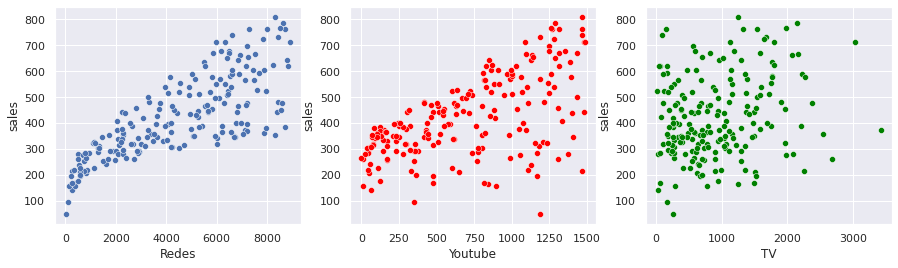

In [ ]:
# Vamos a ver cómo se relaciona cada columna de presupuesto contra las ventas.
# Grafiquemos en una misma figura las tres relaciones.
fig, axs = plt.subplots(1, 3, figsize=(15,4))
# axs son nuestros espacios para graficar. Tenemos 3 espacios.

# Redes
#axs[0] nos dice que vamos a graficar en el primer espacio.
sns.scatterplot(data=AdvmiNegocio, x='Redes',y='sales', ax=axs[0])
# Youtube
#axs[1] nos dice que vamos a graficar en el segundo espacio.
sns.scatterplot(data=AdvmiNegocio, x='Youtube',y='sales', ax=axs[1], color='red')
# TV
sns.scatterplot(data=AdvmiNegocio, x='TV',y='sales', ax=axs[2], color='green')

3. ¿ Qué conclusiones puedes obtener de las graficas anteriores?

Lo que se puede observar de las gráficas es que existe una correlación observable y positiva entre la cantidad de presupuesto gastado en Redes y YouTube y la cantidad de ventas para la compañía. Dicho de otra manera, mientras más presupuesto gastado en esos medios más grande la cantidad de ventas. Sin embargo, con respecto a TV no hay una tendencia observable. 


4. **Regresión lineal**. En su forma más simple, consiste en asumir que una variable $x$ y una variable $y$ presentan una relación lineal de la forma:

$$ y \approx \beta_0 + \beta_1 \cdot x$$

¿Cuál es el valor de beta_0 , beta_1 y el Score  para **Redes vs Ventas** , **TV vs Ventas** y **YouTube vs Ventas**?

In [ ]:
# Con esta función, podemos calcular los coeficientes para cada una de las variables

# Redes
lm1 = LinearRegression()
# La variable X la ponemos con doble corchete!
lm1.fit(AdvmiNegocio[['Redes']], AdvmiNegocio['sales'])
print('Redes')
print('beta_0: ', lm1.intercept_)
print('beta_1: ', lm1.coef_)
print('Score: ', lm1.score(AdvmiNegocio[['Redes']], AdvmiNegocio['sales']), '\n')

# Youtube
lm2 = LinearRegression()
# La variable X la ponemos con doble corchete!
lm2.fit(AdvmiNegocio[['Youtube']], AdvmiNegocio['sales'])
print('YouTube')
print('beta_0: ', lm2.intercept_)
print('beta_1: ', lm2.coef_)
print('Score: ', lm2.score(AdvmiNegocio[['Youtube']], AdvmiNegocio['sales']), '\n')


# TV
lm3 = LinearRegression()
# La variable X la ponemos con doble corchete!
lm3.fit(AdvmiNegocio[['TV']], AdvmiNegocio['sales'])
print('TV')
print('beta_0: ', lm3.intercept_)
print('beta_1: ', lm3.coef_)
print('Score: ', lm3.score(AdvmiNegocio[['TV']], AdvmiNegocio['sales']))

Redes
beta_0:  210.97780647383084
beta_1:  [0.04753664]
Score:  0.611875050850071 

YouTube
beta_0:  279.3491428547485
beta_1:  [0.20249578]
Score:  0.33203245544529536 

TV
beta_0:  370.5422120783448
beta_1:  [0.0546931]
Score:  0.05212044544430494


5. ¿Cuál de los modelos es mejor de acuerdo al score ordenalos del mejor al peor?

El mejor modelo de acuerdo al score seria el de Redes, seguido por el de YouTube y por ultimo el de TV. 

Orden:


1.   Redes
2.   YouTube
3.   TV



6.  **Regresión lineal múltiple**. Como ahora vamos a incluir más de una variable, el modelo se rescribe a :

$$ \hat{y} = \hat{\beta}_0 + \hat{\beta}_1 \cdot x_1 + \hat{\beta}_2 \cdot x_2 + \hat{\beta}_3\cdot x_3 + \ldots \epsilon $$

Elige  las diferentes combinaciones de variables. Ejemplo: Redes y Youtube vs Ventas 

¿Cuál es el valor de beta_0, betas_1 , beta_2 , el score y el score ajustado de **Redes y Youtube vs Ventas**, **Redes y TV vs Ventas**, **Youtube y TV vs Ventas**, **Redes y TV**, **Tv y Redes vs Ventas**  y **Ventas vs Youtube vs Ventas**  ?



In [ ]:
def score_adj(X, y, model):
    return 1 - (1-model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)

In [ ]:
# Vamos a calcular el modelo con dos variables simultáneas
# Redes y Youtube
lm4 = LinearRegression()
# La variable X la ponemos con doble corchete!
lm4.fit(AdvmiNegocio[['Redes', 'Youtube']], AdvmiNegocio['sales'])
print('Redes y Youtube')
print('beta_0: ', lm4.intercept_)
print('betas: ', lm4.coef_)
print('Score: ', lm4.score(AdvmiNegocio[['Redes', 'Youtube']], AdvmiNegocio['sales']))
print('Score ajustado:', score_adj(AdvmiNegocio[['Redes', 'Youtube']],
                                   AdvmiNegocio['sales'], lm4), '\n')

# Redes y TV
lm5 = LinearRegression()
# La variable X la ponemos con doble corchete!
lm5.fit(AdvmiNegocio[['Redes', 'TV']], AdvmiNegocio['sales'])
print('Redes y TV')
print('beta_0: ', lm5.intercept_)
print('betas: ', lm5.coef_)
print('Score: ', lm5.score(AdvmiNegocio[['Redes', 'TV']], AdvmiNegocio['sales']))
print('Score ajustado:', score_adj(AdvmiNegocio[['Redes', 'TV']],
                                   AdvmiNegocio['sales'], lm5), '\n')

# Youtube y TV
lm6 = LinearRegression()
# La variable X la ponemos con doble corchete!
lm6.fit(AdvmiNegocio[['Youtube', 'TV']], AdvmiNegocio['sales'])
print('Youtube y TV')
print('beta_0: ', lm6.intercept_)
print('betas: ', lm6.coef_)
print('Score: ', lm6.score(AdvmiNegocio[['Youtube', 'TV']], AdvmiNegocio['sales']))
print('Score ajustado:', score_adj(AdvmiNegocio[['Youtube', 'TV']],
                                   AdvmiNegocio['sales'], lm6), '\n')

lm7 = LinearRegression()
# La variable X la ponemos con doble corchete!
lm7.fit(AdvmiNegocio[['Redes','Youtube','TV']], AdvmiNegocio['sales'])
print('Redes , Youtube, TV')
print('beta_0: ', lm7.intercept_)
print('betas: ', lm7.coef_)
print('Score: ', lm7.score(AdvmiNegocio[['Redes','Youtube','TV']], AdvmiNegocio['sales']))
print('Score ajustado:', score_adj(AdvmiNegocio[['Redes', 'Youtube', 'TV']],
                                   AdvmiNegocio['sales'], lm7), '\n')


Redes y Youtube
beta_0:  87.63299737215414
betas:  [0.04575482 0.18799423]
Score:  0.8971942610828956
Score ajustado: 0.8961505479974428 

Redes y TV
beta_0:  173.24843903734896
betas:  [0.04690121 0.04421942]
Score:  0.6458354938293271
Score ajustado: 0.6422399150864777 

Youtube y TV
beta_0:  275.66761377589694
betas:  [0.19904459 0.00664417]
Score:  0.33270518395032256
Score ajustado: 0.3259306172899198 

Redes , Youtube, TV
beta_0:  88.16668108378224
betas:  [ 0.04576465  0.18853002 -0.00103749]
Score:  0.8972106381789521
Score ajustado: 0.8956373316204667 



7.  ¿Cuál modelo es el que nos conviene elegir?

El modelo que nos conviene elegir es el de Redes y YouTube vs ventas, debido a que es el que tiene el mayor score ajustado. Aunque técnicamente su diferencia con el de Redes, YouTube, y TV vs ventas debe de ser negligente ya que sus scores ajustados son muy similares. 

8. Conclusiones 

 A01720476- David Sanchez : Con esta actividad yo siento que pude llegar a un muy buen entendimiento de cómo pueden llegar a ser útiles las regresión lineal múltiples para tomar en cuenta múltiples variables. Particularmente en este ejemplo se me hizo muy interesante que el mejor modelo fue uno que tomaba en cuenta a Redes y YouTube, ya que esto se puede conectar a la relación que tienen en la vida real. 

 A00829368 Leonardo Pérez Estrada: El uso de la Regresion Lineal es un elemento importante para el análisis de datos, el aprenderlo a usar en nuevas herramientas es algo muy importante de saber para futuros proyectos, Google Colaboratory como había mencionado antes es una herramienta excelente para este tipo de trabajos por la cantidad enorme de librerias que posé para trabajar, nos ayudó mucho en la optimización y desarrollo del código de cada punto de esta actividad, además de diferentes datos que no nos sirvieron mucho en este ejercicio, pero que si lo desarrollamos más son muy importantes para el análisis de datos. 

A01568178-Geraldine Torres: La regresión simple nos ayuda a examinar la relación lineal entre dos variables, una dependiente y otra independiente, proporcionandonos una linea que se ajusta a los datos analizados. Por otro lado la regresión lineal múltiple examina las relaciones entre 2 o más variables dependientes, permitiendonos obseravr si bajo las mismas condiciones en la variable independiente, ambas variables se mantienen igual.
En la regresipon lineal, se obtuvo que el mejor modelo es el de redes, ya que a pesar de tener un coeficiente de determianción bajo (se considera bueno cuando oscila entre los valores de 95-100%), es el modelo que mayor coeficiente tiene.
En cuanto a la regresión lineal multiple, obtuvimos que el mejor modelo es el de Redes vs Youtube y TV ya que se obtuvo un mejor R2 ajustado.